## Part 2. Clustering states

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hr
%matplotlib inline

#### 1. Perform PCA on the dataset and plot the observations on the first and second principal components. 

In [2]:
arrest = pd.read_csv('USArrests.csv', index_col=0)
var_names = arrest.columns.values

In [3]:
pca = PCA()
arrest_r = pca.fit(arrest).transform(arrest)
arrest_X = pd.DataFrame(pca.fit_transform(arrest), columns=["PC1", "PC2", "PC3", "PC4"], index = arrest.index)

In [4]:
def pca_draw():
    plt.close
    plt.figure(figsize=(12,9))
    plt.xlim(-220, 220)
    plt.ylim(-50, 50)
    plt.axvline(x=0, linewidth=1, color='r', alpha=0.5, ls='dotted')
    plt.axhline(y=0, linewidth=1, color='r', alpha=0.5, ls='dotted')
    plt.title('The first two components for the US Arrest Data (Unstandardized)')
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')   
    for i in range(0,4):
        plt.arrow(0,0,arrest_X.PC1[i], arrest_X.PC2[i])
    for i in range(0,4):
        plt.annotate(arrest.columns[i], (arrest_X.PC1[i]*1.1, arrest_X.PC2[i]*1.1), color='red')
    for i, j in zip(arrest.index, pca.fit_transform(arrest_r)):
        plt.annotate(i, (j[0], j[1]), color='grey')
    plt.show()

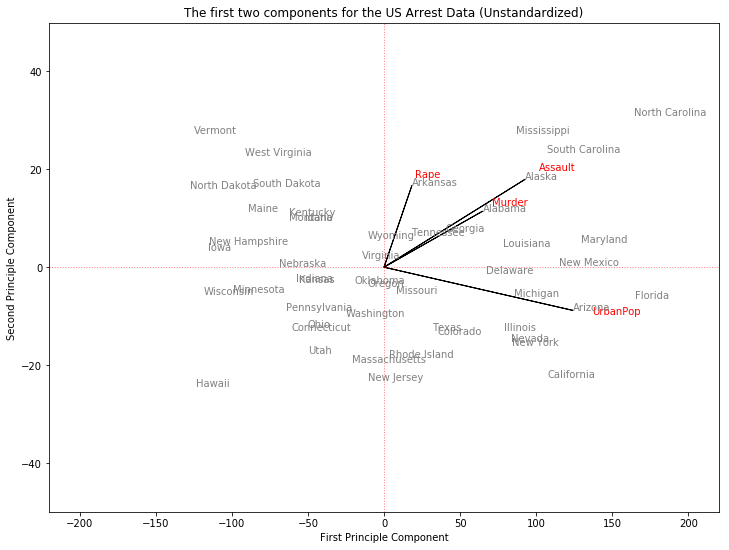

In [5]:
pca_draw()

#### 2. Perform $K$-means clustering with $K=2$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

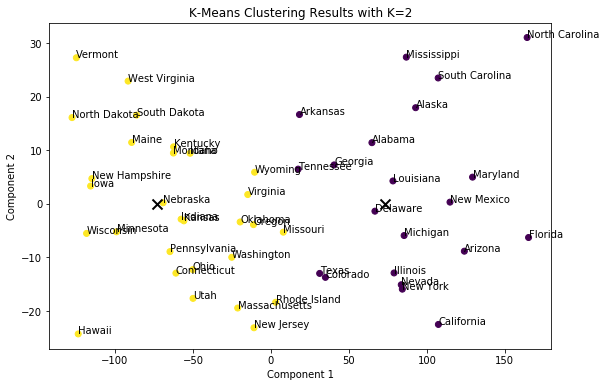

In [6]:
km2 = KMeans(n_clusters=2, n_init=20).fit(arrest)
fig, ax1 = plt.subplots(figsize=(9,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering Results with K=2')
X = pca.fit_transform(km2.cluster_centers_)
for i in arrest.index:
    plt.annotate(i, (arrest_X.PC1[i], arrest_X.PC2[i]))
plt.scatter(pd.DataFrame(pca.fit_transform(arrest))[0], pd.DataFrame(pca.fit_transform(arrest))[1], c=km2.labels_) 
plt.scatter(X[:, 0], X[:, 1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

The states are divided into two groups

#### 3. Perform $K$-means clustering with $K=4$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

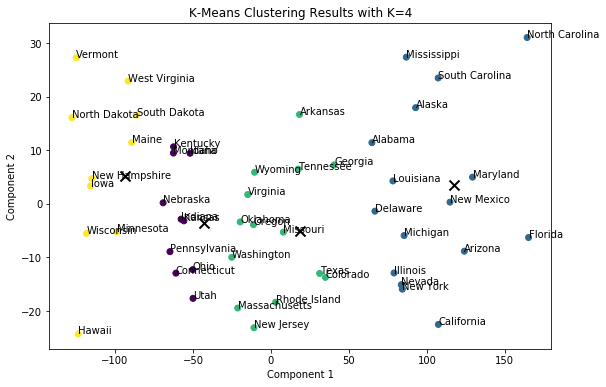

In [7]:
km4 = KMeans(n_clusters=4, n_init=20).fit(arrest)
fig, ax1 = plt.subplots(figsize=(9,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering Results with K=4')
X = pca.fit_transform(km4.cluster_centers_)
for i in arrest.index:
    plt.annotate(i, (arrest_X.PC1[i], arrest_X.PC2[i]))
plt.scatter(pd.DataFrame(pca.fit_transform(arrest))[0], pd.DataFrame(pca.fit_transform(arrest))[1], c=km4.labels_) 
plt.scatter(X[:, 0], X[:, 1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

The first group when K=2 is divided into 3 groups when K=4. Some States in the second group when K=2 joins the third group when K=4 (Texas, Colorado).

#### 4. Perform $K$-means clustering with $K=3$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

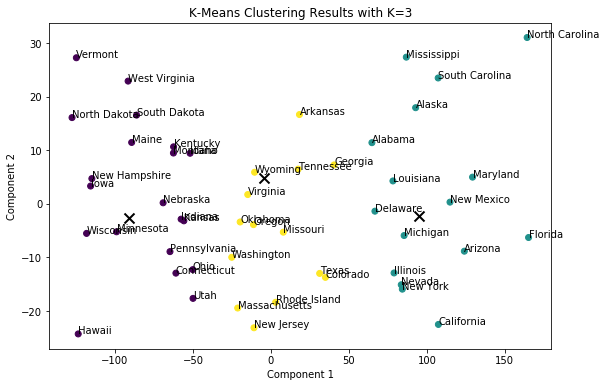

In [8]:
km3 = KMeans(n_clusters=3, n_init=20).fit(arrest)
fig, ax1 = plt.subplots(figsize=(9,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-Means Clustering Results with K=3')
X = pca.fit_transform(km3.cluster_centers_)
for i in arrest.index:
    plt.annotate(i, (arrest_X.PC1[i], arrest_X.PC2[i]))
plt.scatter(pd.DataFrame(pca.fit_transform(arrest))[0], pd.DataFrame(pca.fit_transform(arrest))[1], c=km3.labels_) 
plt.scatter(X[:, 0], X[:, 1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

Divides into 3 groups. The first group when K=2 is divided into 2 groups when K=3. Some States in the second group when K=2 joins the second group when K=3 (Texas, Colorado).

Discussion: It seems that it is the first component that tells different states apart. From the PCA we know that the first component is mainly crime, rape, etc. That is to say, states in different clusters tend to have homogenuous crime rates but heterogenuous urban population.

#### 5. Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.

Text(0,0.5,'Second Principle Component')

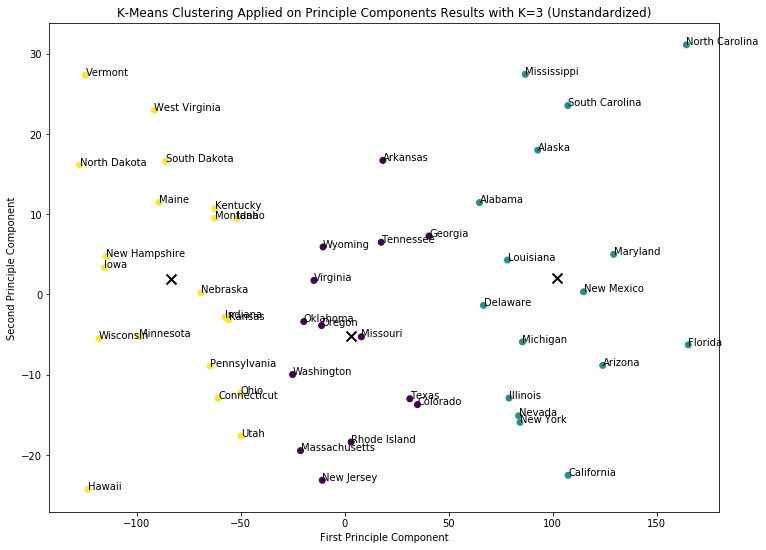

In [9]:
X2 = pd.DataFrame(scale(arrest), index=arrest.index, columns=arrest.columns)
pca2_full = PCA().fit(X2)
pca_loadings2_full = pd.DataFrame(pca2_full.components_.T, index=arrest.columns, columns=['1','2','3','4'])
arrest_s = pd.DataFrame(pca2_full.fit_transform(arrest), columns=['PC1','PC2','PC3','PC4'], index=X2.index)

km3_pc = KMeans(n_clusters=3, n_init=20).fit(arrest_s)

fig, ax = plt.subplots( figsize=(12,9))
# df_plot
ax.scatter(arrest_s.PC1, arrest_s.PC2, c=km3_pc.labels_) 
ax.set_title('K-Means Clustering Applied on Principle Components Results with K=3 (Unstandardized)')
ax.scatter(km3_pc.cluster_centers_[:,0], km3_pc.cluster_centers_[:,1], marker='x', s=100, c='k', linewidth=2)
for i in arrest.index:
    plt.annotate(i, (arrest_s.PC1[i], arrest_s.PC2[i]))
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')

I think scale does not matter when it comes to clustering, the groups are separated into the same groups compared with the unstandardized data.

##### 6. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

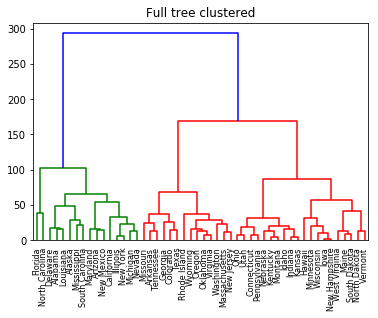

In [10]:
Z = hr.complete(arrest)
hr.dendrogram(Z, labels = arrest.index)
plt.title("Full tree clustered")
plt.show()

##### 7. Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

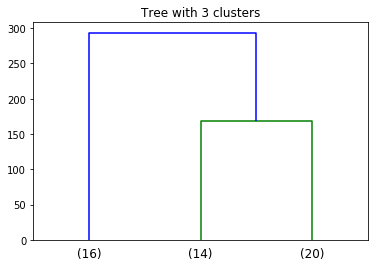

In [11]:
Z2 = hr.complete(arrest)
hr.dendrogram(Z2, truncate_mode='lastp', p=3, labels = arrest.index)
plt.title("Tree with 3 clusters")
plt.show()

In [12]:
tree = hr.fcluster(Z,3,criterion='maxclust')
tree_series = pd.Series(tree, dtype="category")
A = pd.Series(arrest.index).groupby(tree_series)
for group, state in A:
        print (f'The states in group {group} are {", ".join(list(state))}.')

The states in group 1 are Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina.
The states in group 2 are Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.
The states in group 3 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin.


##### Question 8. Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?

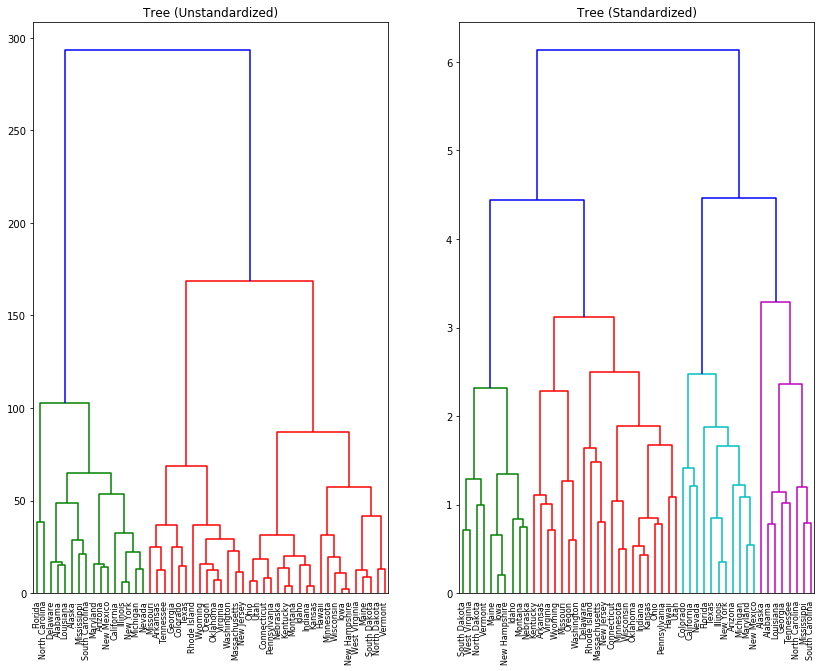

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 10.5))
Z3 = hr.complete(arrest)
hr.dendrogram(Z3, labels = arrest.index, ax=ax1)
ax1.set_title("Tree (Unstandardized)")

Z4 = hr.complete(X2)
hr.dendrogram(Z4, labels = arrest.index, ax=ax2)
ax2.set_title("Tree (Standardized)")
plt.show()

The figure on the left is the unstandardized one, the figure to the right is the standardized one. It looks that both of the graphs looks similar, and the standardized one has much more branches. When we probe into the standardized graph, we can see that most states are actually much more closer with each other. I think this can be explained by the fact that some factors have more variances on the other, and without standardization, these factors tend to carry more weight. Therefore, it makes some observations far away from the normal ones. With standardization, this effect is gone.